In [9]:
import matplotlib.pyplot as plt
import numpy as np

- last if edited
- peso is removed since it's duplicated with manchester
- hdb3 is not working efficiently so i changed that function

ValueError: x and y must have same first dimension, but have shapes (12,) and (6,)

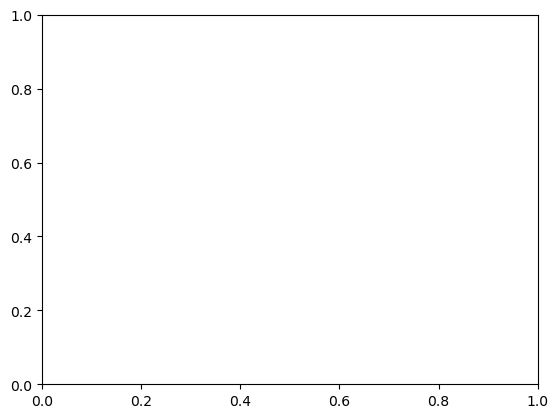

In [6]:
def ami(bits):
    signal = []
    last_voltage = 1  # start with positive voltage
    for bit in bits:
        if bit == '1':
            signal.append(last_voltage)
            last_voltage *= -1  # toggle voltage on each '1'
        else:
            signal.append(0)  # represent '0' with zero voltage
    return signal

def rz(bits):
    signal = []
    for bit in bits:
        if bit == '1':
            signal.extend([1, 0])  # high for first half, low for second half
        else:
            signal.extend([0, 0])  # low for both halves for '0'
    return signal

def nrz(bits):
    signal = [1 if bit == '1' else -1 for bit in bits]
    return signal

def manchester(bits):
    signal = []
    for bit in bits:
        if bit == '1':
            signal.extend([-1, 1])  # high to low for '1'
        else:
            signal.extend([1, -1])  # low to high for '0'
    return signal

def hdb3(bits):
    signal = []
    last_nonzero = 1
    zero_count = 0
    for bit in bits:
        if bit == '1':
            if zero_count == 4:
                signal[-4] = last_nonzero
                signal.append(0)
                zero_count = 0
            else:
                signal.append(last_nonzero)
                last_nonzero *= -1
            zero_count = 0
        else:
            zero_count += 1
            if zero_count == 4:
                if last_nonzero == -1:
                    signal.extend([0, 0, 0, 1])
                else:
                    signal.extend([0, 0, 0, -1])
                zero_count = 0
            else:
                signal.append(0)
    return signal


''' this section is commented so if you run all , notebook works without bug
    i printed results before commenting so we can see history of changes
    if you cleared output, you should change here manually'''
# def plot_signal(bits, coding_name):
#     n = len(bits)
#     time = range(2 * n)  # each bit is represented by two points
#     signal = globals()[coding_name.lower()](bits)  # call the corresponding function dynamically
    
#     plt.step(time, signal, where='post')
#     plt.title(f"{coding_name} Coding")
#     plt.xlabel("Time")
#     plt.ylabel("Amplitude")
#     plt.ylim([-1.5, 1.5])  # Adjust y-axis limits if needed
#     plt.xticks(range(0, 2 * n, 2), labels=range(0, n, 1))  # label each bit
#     plt.grid(True)
#     plt.show()
    
    

# Example usage
# if edited
# if __name__ == "__main__":
#     bits = "010101"
    
#     plot_signal(bits, "AMI")
#     plot_signal(bits, "RZ")
#     plot_signal(bits, "NRZ")
#     plot_signal(bits, "Manchester")
#     plot_signal(bits, "HDB3")
#     plot_signal(bits, "PESO")

- x and y data used for plotting do not have the same length. so it will create conflict in time and signal

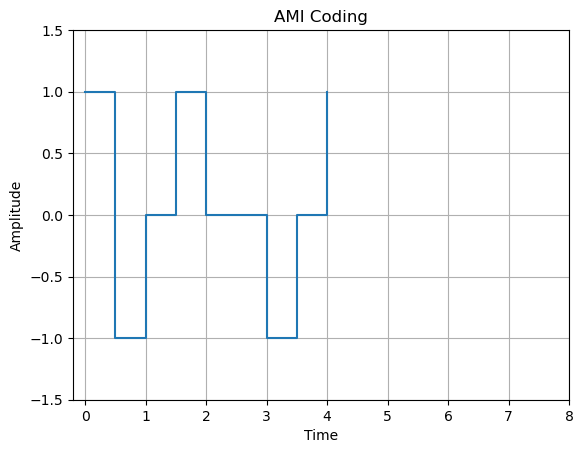

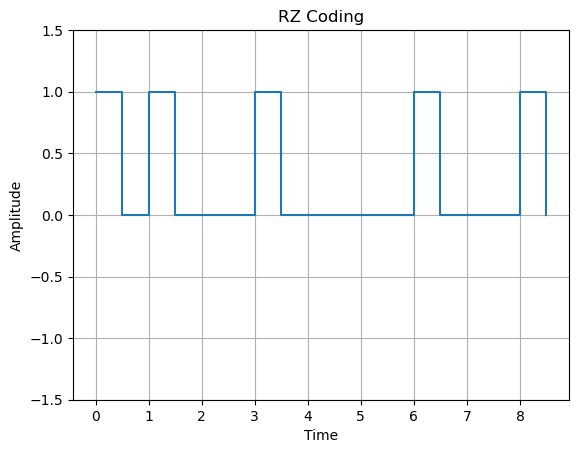

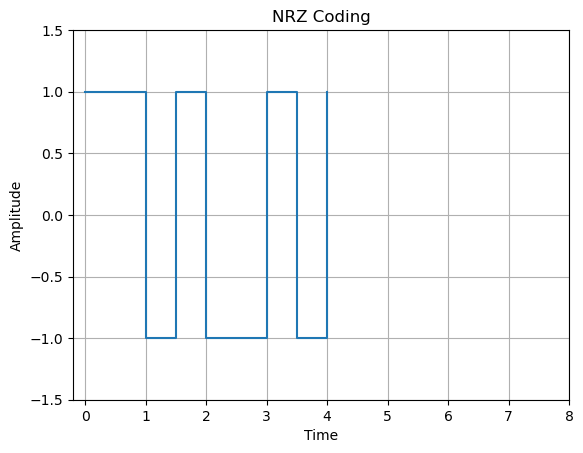

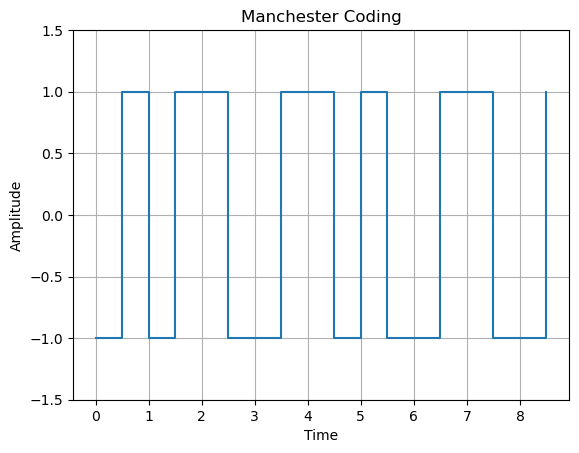

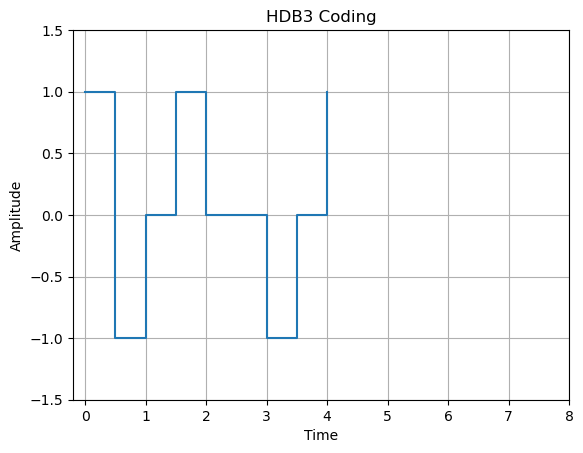

In [10]:
def ami(bits):
    signal = []
    last_voltage = 1  # start with positive voltage
    for bit in bits:
        if bit == '1':
            signal.append(last_voltage)
            last_voltage *= -1  # toggle voltage on each '1'
        else:
            signal.append(0)  # represent '0' with zero voltage
    return signal

def rz(bits):
    signal = []
    for bit in bits:
        if bit == '1':
            signal.extend([1, 0])  # high for first half, low for second half
        else:
            signal.extend([0, 0])  # low for both halves for '0'
    return signal

def nrz(bits):
    signal = [1 if bit == '1' else -1 for bit in bits]
    return signal

def manchester(bits):
    signal = []
    for bit in bits:
        if bit == '1':
            signal.extend([-1, 1])  # high to low for '1'
        else:
            signal.extend([1, -1])  # low to high for '0'
    return signal

def hdb3(bits):
    signal = []
    last_nonzero = 1
    zero_count = 0
    for bit in bits:
        if bit == '1':
            if zero_count == 4:
                signal[-4] = last_nonzero
                signal.append(0)
                zero_count = 0
            else:
                signal.append(last_nonzero)
                last_nonzero *= -1
            zero_count = 0
        else:
            zero_count += 1
            if zero_count == 4:
                if last_nonzero == -1:
                    signal.extend([0, 0, 0, 1])
                else:
                    signal.extend([0, 0, 0, -1])
                zero_count = 0
            else:
                signal.append(0)
    return signal

''' this section is commented so if you run all , notebook works without bug
    i printed results before commenting so we can see history of changes
    if you cleared output, you should change here manually'''
# def plot_signal(bits, coding_name):
#     signal = globals()[coding_name.lower()](bits)  # call the corresponding function dynamically
#     time = np.arange(len(signal))
    
#     plt.step(time, signal, where='post')
#     plt.title(f"{coding_name} Coding")
#     plt.xlabel("Time")
#     plt.ylabel("Amplitude")
#     plt.ylim([-1.5, 1.5])  # Adjust y-axis limits if needed
    
#     # Generate ticks for each bit position
#     bit_positions = np.arange(0, len(bits) * 2, 2)
#     plt.xticks(bit_positions, labels=range(len(bits)))  # label each bit
#     plt.grid(True)
#     plt.show()

# if __name__ == "__main__":
#     bits = "110100101"
    
#     plot_signal(bits, "AMI")
#     plot_signal(bits, "RZ")
#     plot_signal(bits, "NRZ")
#     plot_signal(bits, "Manchester")
#     plot_signal(bits, "HDB3")

-  writing ask , fsk , qam , psk

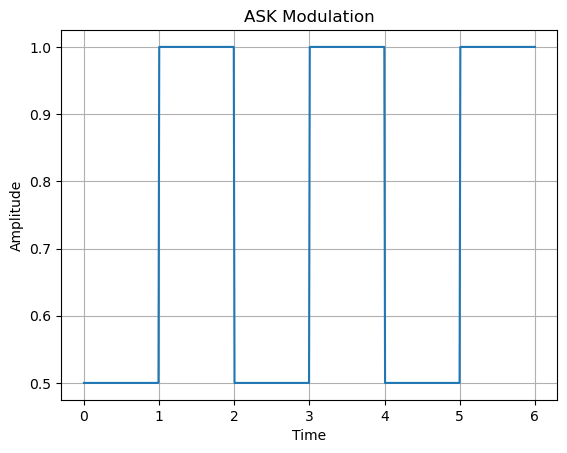

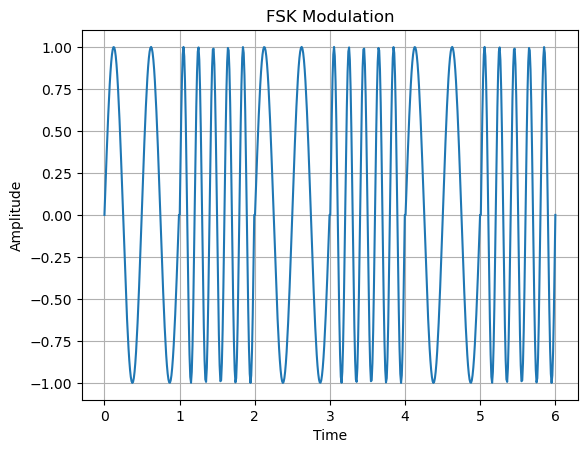

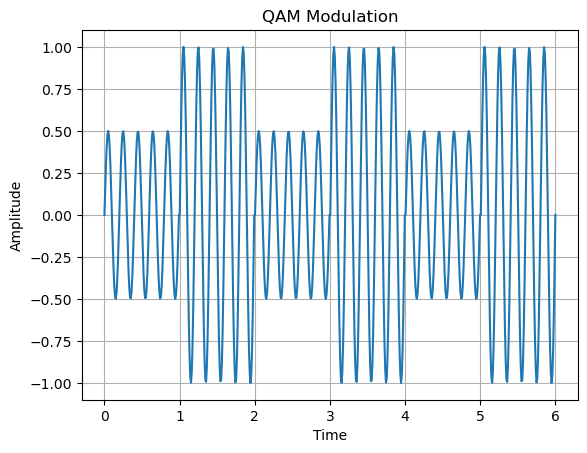

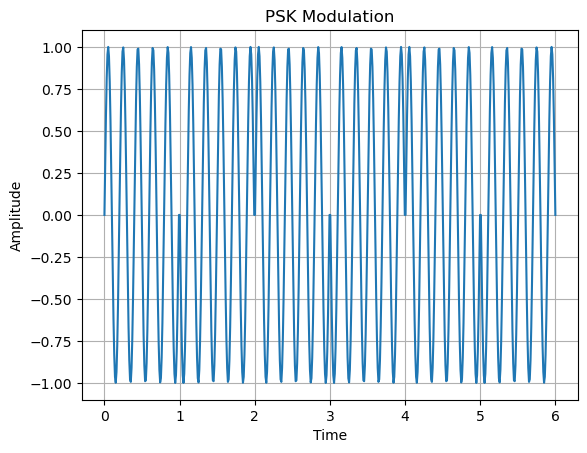

In [12]:
def ask(bits, amp1=1, amp0=0.5, bit_duration=1, samples_per_bit=100):
    t = np.linspace(0, bit_duration, samples_per_bit)
    signal = np.concatenate([amp1 * np.ones(samples_per_bit) if bit == '1' else amp0 * np.ones(samples_per_bit) for bit in bits])
    return signal, t

def fsk(bits, f1=5, f0=2, bit_duration=1, samples_per_bit=100):
    t = np.linspace(0, bit_duration, samples_per_bit)
    signal = np.concatenate([np.sin(2 * np.pi * f1 * t) if bit == '1' else np.sin(2 * np.pi * f0 * t) for bit in bits])
    return signal, t

def qam(bits, amp1=1, amp0=0.5, bit_duration=1, samples_per_bit=100):
    t = np.linspace(0, bit_duration, samples_per_bit)
    carrier = np.sin(2 * np.pi * 5 * t)  # 5 Hz carrier frequency
    signal = np.concatenate([(amp1 * carrier) if bit == '1' else (amp0 * carrier) for bit in bits])
    return signal, t

def psk(bits, f=5, bit_duration=1, samples_per_bit=100):
    t = np.linspace(0, bit_duration, samples_per_bit)
    signal = np.concatenate([np.sin(2 * np.pi * f * t + (0 if bit == '0' else np.pi)) for bit in bits])
    return signal, t


''' this section is commented so if you run all , notebook works without bug
    i printed results before commenting so we can see history of changes
    if you cleared output, you should change here manually'''
# def plot_signal(bits, coding_name):
#     n = len(bits)
#     samples_per_bit = 100
#     signal_function = globals()[coding_name.lower()]
#     signal, t = signal_function(bits, samples_per_bit=samples_per_bit)
#     time = np.linspace(0, n, len(signal))

#     plt.plot(time, signal)
#     plt.title(f"{coding_name} Modulation")
#     plt.xlabel("Time")
#     plt.ylabel("Amplitude")
#     plt.grid(True)
#     plt.show()

# if __name__ == "__main__":
#     bits = "010101"

#     plot_signal(bits, "ASK")
#     plot_signal(bits, "FSK")
#     plot_signal(bits, "QAM")
#     plot_signal(bits, "PSK")

combining plotting function and write new main function

In [4]:
def plot_signal(bits, coding_name):
    n = len(bits)
    samples_per_bit = 100
    
    signal_function = globals()[coding_name.lower()]
    try:
        # If it requires samples_per_bit parameter
        signal, t = signal_function(bits, samples_per_bit=samples_per_bit)
        time = np.linspace(0, n, len(signal))
        plt.plot(time, signal)
    except TypeError:
        # If it does not require samples_per_bit parameter
        signal = signal_function(bits)
        time = np.arange(len(signal))
        plt.step(time, signal, where='post')
        bit_positions = np.arange(0, len(bits) * 2, 2)
        plt.xticks(bit_positions, labels=range(len(bits)))  

    plt.title(f"{coding_name} Signal")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.ylim([-1.5, 1.5])  
    plt.grid(True)
    plt.show()

### Main

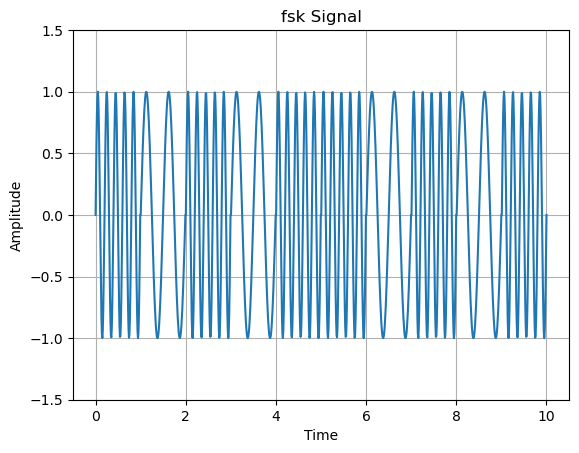

In [7]:
if __name__ == "__main__":
    while True:
        bits = input("Enter the bit sequence:")
        if all(bit in '01' for bit in bits):
            break
        else:
            print("Invalid input. Please enter a sequence of 0s and 1s only.")
    
    while True:
        coding_name = input("Enter the modulation function name: [ 'ami' , 'rz' , 'nrz' , 'manchster' , 'hdb3' , 'ask' , 'fsk' , 'qam' , 'psk'] ")
        if coding_name.lower() in globals():
            try:
                signal_function = globals()[coding_name.lower()]
                plot_signal(bits, coding_name)
                break
            except (TypeError, KeyError):
                print("Invalid modulation function. Please enter a valid coding/modulation function name, valid list = [ 'ami' , 'rz' , 'nrz' , 'manchster' , 'hdb3' , 'ask' , 'fsk' , 'qam' , 'psk']")
        else:
            print("Invalid modulation function. Please enter a valid coding/modulation function name.")
